In [1]:
# figure 1 is all about identifications - we can see 10 distinct clusters of cells that perfectly reflect 10 ligands/sensors - except DA/NE at DA3.0
# also identification elements of figure s3 are here (first heatmaps)

In [588]:
# load in all movies to be used in this set of figures
import numpy as np
movie_list = [r'H:\CNMFoutputs\peter\mask_matching\20230823_PL28_done\20230823_PL28_wells201_Tiara_done_qc_doneqc',
             r'H:\CNMFoutputs\peter\mask_matching\20230915_PL52_done\20230915_PL52_wells301_Yael_Done_qc_doneqc',
             r'H:\CNMFoutputs\charlotte\mask_matching\20230916_PL48_charlotte_done\20230916_PL48_wells001_Tiara_done_qc_doneqc',
             r'H:\CNMFoutputs\peter\mask_matching\20230916_PL54_done\20230916_PL54_wells201_jordan_done_qc_doneqc',
             r'H:\CNMFoutputs\charlotte\mask_matching\20230920_PL58_charlotte_done\20230920_PL58_wells001_Done_qc_doneqc',
             r'H:\CNMFoutputs\peter\mask_matching\20230922_PL28_done\old_20230922_PL28_wells001_jordan_done_qc_done', #use old_version where necessary
             r'H:\CNMFoutputs\charlotte\mask_matching\20230923_PL35_charlotte_done\20230923_PL35_wells001_Tiara_done_qc_doneqc',
             r'H:\CNMFoutputs\peter\mask_matching\20230925_PL58_done\20230925_PL58_wells001_jordan_done_qc_doneqc',
             r'H:\CNMFoutputs\charlotte\mask_matching\20230926_PL56_charlotte_done\20230926_PL56_wells001_Done_qc_doneqc', 
             r'H:\CNMFoutputs\charlotte\mask_matching\20230927_PL34_charlotte_done\20230927_PL34_wells001_david_done_qc_doneqc',
             r'H:\CNMFoutputs\peter\mask_matching\20230927_PL58_done\20230927_PL58_wells001_david_done_qc_doneqc']
#which fit to use - can be varied if no # at the end of the row - probably dose-response is best, unless it's late in the dipping (confirm best for each movie)
pythonic_list = [1, #
                2, #
                0, #
                1, #
                1,
                1,
                0,
                1,
                1,
                1,
                1] 
mean_factor = [52,
               31,
               31,
               31,
               31,
               31,
               31,
               31,
               31,
               31,
               31] #[31 for i in range(len(pythonic_list))]
well_ids = [['AVP',
           'OXT',
           'ANA5VMAS-6',
           'ANA5VMAS-5',
           'ANA5VMAS-4',
           'ANA5VMAS-3',
           'ANA5VMAS-2',
           'ANA5VMAS-1',
           'DAOANPCH-6',
           'DAOANPCH-5',
           'DAOANPCH-4',
           'DAOANPCH-3',
           'DAOANPCH-2',
           'DAOANPCH-1',
           'P',
           'ACh',
           'NE',
           'ATP',
           '5HT',
           'DA',
           'MT',
           'SST',
           'P',
           'CCK',
           'HA',
           'Ado',
           'PTH',
           'NPY',
           'VIP',
           'AEA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P'],
           ['AVP',
           'OXT',
           '5HT',
           'CCK',
           'NPY',
           'VIP',
           'NE',
           'SST',
           'DA',
           'ACh',
           'ATP',
           'MT',
           'PTH',
           'Ado',
           'AEA',
           'HA',
           'P']]
wells_exclude = [np.arange(2,14),
                None,
                None,
                None,
                None,
                None,
                None,
                None,
                None,
                None,
                None]

In [589]:
%%time
# All set up for merged_refit files! Remember to adjust for raw
## LOADING EVERYTHING UP - TAKES ~20 sec

# load packages

import napari
from magicgui import magicgui, widgets
import time
from sklearn.cluster import HDBSCAN
from scipy.spatial.distance import pdist,squareform
from itertools import chain


from IPython import get_ipython
from IPython.display import clear_output
import os
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy import signal as sg
from scipy.ndimage import center_of_mass
import scipy
import pickle

from tifffile.tifffile import imwrite,imread
from tqdm.auto import tqdm,trange

from copy import deepcopy
import h5py

import caiman as cm
from caiman.source_extraction.cnmf import cnmf,params
from caiman.paths import caiman_datadir
from caiman.utils.visualization import get_contours

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
except NameError:
    pass

def load_pickle(file_path):
    """
    Load a dictionary from a pickle file.

    Args:
    - file_path (str): Path to the pickle file.

    Returns:
    - dict: Loaded dictionary.
    """
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data
    

from joblib import Parallel, delayed
from joblib.externals.loky import get_reusable_executor

import contextlib
import joblib
from tqdm import tqdm

n_cores = 35

@contextlib.contextmanager
def tqdm_joblib(tqdm_object):
    """Context manager to patch joblib to report into tqdm progress bar given as argument"""
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_batch_callback = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_batch_callback
        tqdm_object.close()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: total: 0 ns
Wall time: 7.96 ms


In [590]:
print(len(movie_list))
print(len(pythonic_list))
print(len(mean_factor))
print(len(well_ids))
print(len(wells_exclude))

11
11
11
11
11


In [591]:
cnmf_dicts = []

for l in trange(len(movie_list)):
    if r'peter' in movie_list[l]:
        base_dir = r'H:\CNMFoutputs\peter\stitch_warp_done'
    elif r'charlotte' in movie_list[l]:
        base_dir = r'H:\CNMFoutputs\charlotte\stitch_warp_done'
    else:
        print("base dir error")

    cnmf_dict = {
        'base_dir': base_dir,
        'cnmf_path': os.path.join(movie_list[l], 'ch0_means_movie_nobg_cnmf_merged_refit.hdf5'),
        'cnmf': list(),
        'spcomps': list(),
        'CY': list(),
        'cnmf_matched_path': list(),
        'cnmf_matched': list(),
        'spcomps_matched': list(),
        'CY_matched': list(),
        'cnmf_matched_path_raw': list(),
        'cnmf_matched_raw': list(),
        'spcomps_matched_raw': list(),
        'CY_matched_raw': list()
    }

    if pythonic_list[l]==0:
        cnmf_dict['cnmf_matched_path'] = os.path.join(movie_list[l], f'ch0_means_movie_nobg_cnmf_merged_refit_matched.hdf5')
        cnmf_dict['cnmf_matched_path_raw'] = os.path.join(movie_list[l], f'ch0_means_movie_nobg_cnmf_mr_raw_refit_matched.hdf5')
    else:
        cnmf_dict['cnmf_matched_path'] = os.path.join(movie_list[l], f'ch0_means_movie_nobg_cnmf_merged_refit_matched{pythonic_list[l]:01}.hdf5')
        cnmf_dict['cnmf_matched_path_raw'] = os.path.join(movie_list[l], f'ch0_means_movie_nobg_cnmf_mr_raw_refit_matched{pythonic_list[l]:01}.hdf5')
    
    # CNMFE model
    cnmf_dict['cnmf'] = cnmf.load_CNMF(cnmf_dict['cnmf_path'], 
                                n_processes=1,
                                dview=None)
    
    # Line up all static inputs
    cnmf_dict['spcomps'] = np.reshape(cnmf_dict['cnmf'].estimates.A.toarray(),cnmf_dict['cnmf'].estimates.dims + (-1,),order='F')
    cnmf_dict['spcomps'] = cnmf_dict['spcomps'].transpose([3,2,0,1]).astype(np.float32)
    cnmf_dict['CY'] = cnmf_dict['cnmf'].estimates.C + cnmf_dict['cnmf'].estimates.YrA # temporal loadings
    print(f"Successfully loaded merged/refit CNMF model")
    
    # CNMFE model
    cnmf_dict['cnmf_matched'] = cnmf.load_CNMF(cnmf_dict['cnmf_matched_path'], 
                                n_processes=1,
                                dview=None)
    
    # Line up all static inputs
    cnmf_dict['spcomps_matched'] = np.reshape(cnmf_dict['cnmf_matched'].estimates.A.toarray(),cnmf_dict['cnmf_matched'].estimates.dims + (-1,),order='F')
    cnmf_dict['spcomps_matched'] = cnmf_dict['spcomps_matched'].transpose([3,2,0,1]).astype(np.float32)
    cnmf_dict['CY_matched'] = cnmf_dict['cnmf_matched'].estimates.C + cnmf_dict['cnmf_matched'].estimates.YrA # temporal loadings
    print(f"Successfully loaded matched CNMF model")
    
    # CNMFE model
    cnmf_dict['cnmf_matched_raw'] = cnmf.load_CNMF(cnmf_dict['cnmf_matched_path_raw'], 
                                n_processes=1,
                                dview=None)
    
    # Line up all static inputs
    cnmf_dict['spcomps_matched_raw'] = np.reshape(cnmf_dict['cnmf_matched_raw'].estimates.A.toarray(),cnmf_dict['cnmf_matched_raw'].estimates.dims + (-1,),order='F')
    cnmf_dict['spcomps_matched_raw'] = cnmf_dict['spcomps_matched_raw'].transpose([3,2,0,1]).astype(np.float32)
    cnmf_dict['CY_matched_raw'] = cnmf_dict['cnmf_matched_raw'].estimates.C + cnmf_dict['cnmf_matched_raw'].estimates.YrA # temporal loadings
    print(f"Successfully loaded matched raw CNMF model")

    cnmf_dicts.append(cnmf_dict)

  0%|          | 0/11 [00:00<?, ?it/s]

Successfully loaded merged/refit CNMF model
Successfully loaded matched CNMF model
Successfully loaded matched raw CNMF model
Successfully loaded merged/refit CNMF model
Successfully loaded matched CNMF model
Successfully loaded matched raw CNMF model
Successfully loaded merged/refit CNMF model
Successfully loaded matched CNMF model
Successfully loaded matched raw CNMF model
Successfully loaded merged/refit CNMF model
Successfully loaded matched CNMF model
Successfully loaded matched raw CNMF model
Successfully loaded merged/refit CNMF model
Successfully loaded matched CNMF model
Successfully loaded matched raw CNMF model
Successfully loaded merged/refit CNMF model
Successfully loaded matched CNMF model
Successfully loaded matched raw CNMF model
Successfully loaded merged/refit CNMF model
Successfully loaded matched CNMF model
Successfully loaded matched raw CNMF model
Successfully loaded merged/refit CNMF model
Successfully loaded matched CNMF model
Successfully loaded matched raw CNM

In [592]:
well_onsets = []
for l in trange(len(movie_list)):
    well_onsets.append(np.arange(0,cnmf_dicts[l]['CY_matched_raw'].shape[1],3*mean_factor[l]))

  0%|          | 0/11 [00:00<?, ?it/s]

In [593]:
for l in trange(len(movie_list)):
    rises = list()
    for id in range(cnmf_dicts[l]['CY_matched_raw'].shape[0]):
        sig_r = cnmf_dicts[l]['CY_matched_raw'][id,...].T
        sav_test_r = sg.savgol_filter(sig_r,30,1,deriv=1)
        if wells_exclude[l] is not None:
            for i in wells_exclude[l]:
                sav_test_r[well_onsets[l][i]:well_onsets[l][i+1]] = np.min(sav_test_r)
        #rises.append(np.min(np.where(sav_test_m[:30,] == np.max(sav_test_m[:30,]))))
        rises.append(np.min(np.where(sav_test_r == np.max(sav_test_r))))
    cnmf_dicts[l]['rises'] = rises

  0%|          | 0/11 [00:00<?, ?it/s]

In [594]:
for l in trange(len(movie_list)):
    cnmf_dicts[l]['CY_matched_raw_sort'] = np.sort(cnmf_dicts[l]['CY_matched_raw'],axis=1)
    cnmf_dicts[l]['CY_matched_raw_b10'] = np.mean(cnmf_dicts[l]['CY_matched_raw_sort'][:,:int(np.ceil(cnmf_dicts[l]['CY_matched_raw_sort'].shape[1]/10))],axis=1) # bottom 10% mean
    cnmf_dicts[l]['CY_matched_raw_t10'] = np.mean(cnmf_dicts[l]['CY_matched_raw_sort'][:,-int(np.ceil(cnmf_dicts[l]['CY_matched_raw_sort'].shape[1]/10)):],axis=1) # top 10% mean
    
    cnmf_dicts[l]['CY_matched_raw_norm1'] = ((cnmf_dicts[l]['CY_matched_raw'].T-cnmf_dicts[l]['CY_matched_raw_b10'])/(cnmf_dicts[l]['CY_matched_raw_t10']-cnmf_dicts[l]['CY_matched_raw_b10'])).T

  0%|          | 0/11 [00:00<?, ?it/s]

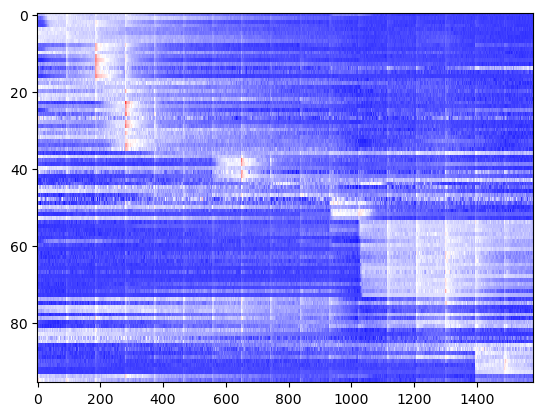

In [623]:
l = 9
plt.imshow(cnmf_dicts[l]['CY_matched_raw_norm1'][np.argsort(cnmf_dicts[l]['rises']),...], interpolation='nearest', aspect='auto',cmap='bwr')

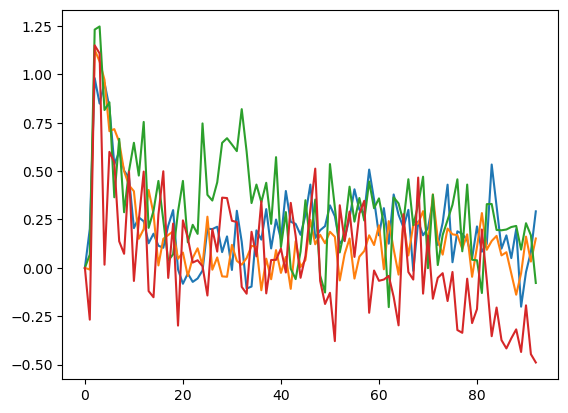

In [640]:
jump = 3*mean_factor[l]
#for k in range(jump-2,jump*2,jump):
fit_range = np.array([0,3,6,7])
for k in list(jump-2+fit_range*jump):
    plt.plot(np.mean(((cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k:k+jump]-(cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k])/((cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k+2]-np.mean((cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k-5:k],0)),1))

In [641]:
# shoot for 8 dips to average across (arbitrary value)
fit_ranges = [np.array([0,1,2,3,4,8,9,11]), # fix
             np.array([0,2,3,4,5,6,7,8,11,14]),# fix
             np.array([1,4,8,11,12,15]),
             np.array([0,1,2,6,7,14]), # fix
             np.array([1,4,8,11]),
             np.array([0,1,4,8,11,12,13,14,15]),
             np.array([3,6,7,11]),
             np.array([0,1,2,7,11,12,15]),
             np.array([0,1,2,4,7,8,13,15]),
             np.array([0,3,6,7]),
             np.array([0,1,2,4,8,11,12,13,15])]

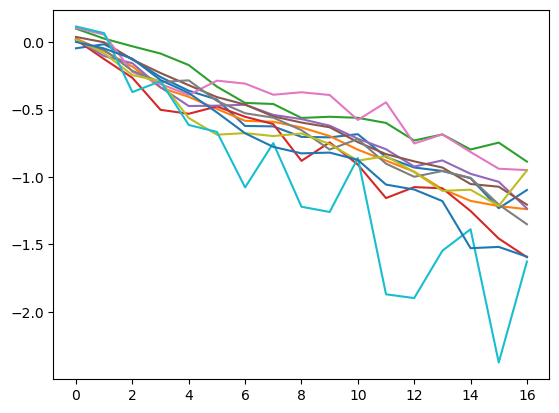

In [644]:
for l in range(len(movie_list)):
    a = []
    jump = 3*mean_factor[l]
    fit_range = fit_ranges[l]
    for k in list(jump-2+fit_range*jump):
        a.append(np.mean(((cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k:k+jump]-(cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k])/((cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k+2]-np.mean((cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k-5:k],0)),1))
    plt.plot(np.log(np.mean(np.array(a)[:,2:19],0)))

  0%|          | 0/11 [00:00<?, ?it/s]

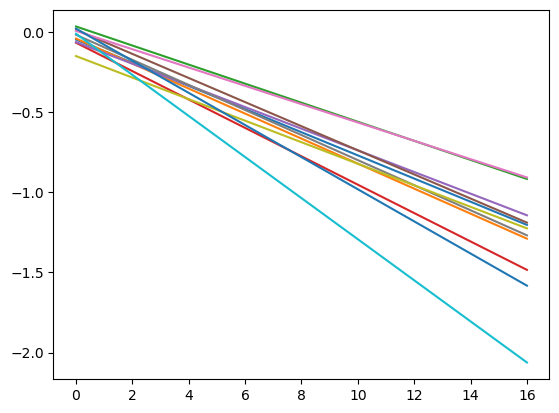

In [645]:
for l in trange(len(movie_list)):
    a = []
    jump = 3*mean_factor[l]
    fit_range = fit_ranges[l]
    for k in list(jump-2+fit_range*jump):
        a.append(np.mean(((cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k:k+jump]-(cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k])/((cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k+2]-np.mean((cnmf_dicts[l]['CY_matched_raw'][np.argsort(cnmf_dicts[l]['rises']),...].T)[k-5:k],0)),1))
    xa = np.arange(2,19)
    ya = np.mean(np.array(a)[:,2:19],0)
    cnmf_dicts[l]['af'] = np.polyfit(xa, np.log(ya), 1)
    plt.plot(cnmf_dicts[l]['af'][0]*xa+cnmf_dicts[l]['af'][1])

In [646]:
for l in trange(len(movie_list)):
    cnmf_dicts[l]['CY_matched_raw_dfs'] = []
    jump = 3*mean_factor[l]
    
    for k in range(jump-2,cnmf_dicts[l]['CY_matched_raw'].shape[1]-3,jump):
        cnmf_dicts[l]['CY_matched_raw_dfs'].append(cnmf_dicts[l]['CY_matched_raw'][:,k+2]-np.mean(cnmf_dicts[l]['CY_matched_raw'][:,k-5:k],1))

    cnmf_dicts[l]['corrbase'] = np.zeros(cnmf_dicts[l]['CY_matched_raw'].shape)
    for d in range(np.array(cnmf_dicts[l]['CY_matched_raw_dfs']).shape[0]):
        cnmf_dicts[l]['corrbase'][:,jump*(d+1):np.minimum(cnmf_dicts[l]['CY_matched_raw'].shape[1]-1,jump*(d+2)-1)] = cnmf_dicts[l]['corrbase'][:,jump*(d+1):np.minimum(cnmf_dicts[l]['CY_matched_raw'].shape[1]-1,jump*(d+2)-1)]+np.broadcast_to(np.exp(cnmf_dicts[l]['af'][0]*np.arange(0,np.minimum(cnmf_dicts[l]['CY_matched_raw'].shape[1]-1-jump*(d+1),jump-1))),(np.array(cnmf_dicts[l]['CY_matched_raw_dfs']).shape[1],) + (np.minimum(cnmf_dicts[l]['CY_matched_raw'].shape[1]-1-jump*(d+1),jump-1),))*np.array(cnmf_dicts[l]['CY_matched_raw_dfs'])[d,:][...,np.newaxis]

    cnmf_dicts[l]['CY_matched_raw_corr'] = cnmf_dicts[l]['CY_matched_raw']-cnmf_dicts[l]['corrbase']
    
    cnmf_dicts[l]['CY_matched_raw_corr_sort'] = np.sort(cnmf_dicts[l]['CY_matched_raw_corr'],axis=1)
    cnmf_dicts[l]['CY_matched_raw_corr_b10'] = np.mean(cnmf_dicts[l]['CY_matched_raw_corr_sort'][:,:int(np.ceil(cnmf_dicts[l]['CY_matched_raw_corr_sort'].shape[1]/10))],axis=1) # bottom 10% mean
    cnmf_dicts[l]['CY_matched_raw_corr_t10'] = np.mean(cnmf_dicts[l]['CY_matched_raw_corr_sort'][:,-int(np.ceil(cnmf_dicts[l]['CY_matched_raw_corr_sort'].shape[1]/10)):],axis=1) # top 10% mean
    
    cnmf_dicts[l]['CY_matched_raw_corr_dff'] = ((cnmf_dicts[l]['CY_matched_raw_corr'].T-cnmf_dicts[l]['CY_matched_raw_corr_b10'])/(cnmf_dicts[l]['CY_matched_raw_corr_b10'])).T
    cnmf_dicts[l]['CY_matched_raw_corr_norm1'] = ((cnmf_dicts[l]['CY_matched_raw_corr'].T-cnmf_dicts[l]['CY_matched_raw_corr_b10'])/(cnmf_dicts[l]['CY_matched_raw_corr_t10']-cnmf_dicts[l]['CY_matched_raw_corr_b10'])).T

  0%|          | 0/11 [00:00<?, ?it/s]

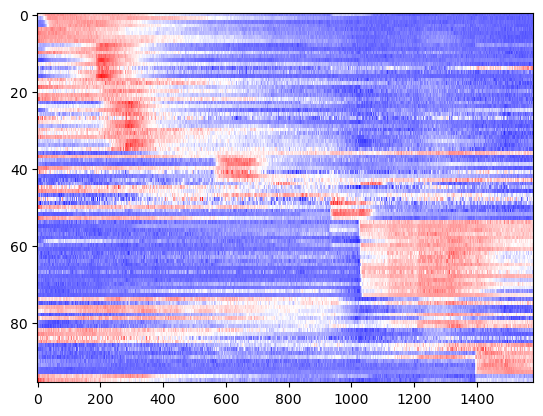

In [647]:
l = 9
plt.imshow(cnmf_dicts[l]['CY_matched_raw_corr_norm1'][np.argsort(cnmf_dicts[l]['rises']),...], interpolation='nearest', aspect='auto',cmap='bwr')
# looks like the good ones so far (not including last two to be analyzed) are: 2,4,5,6,7,8,(x),9 (will be 10) - top so far are (2),5,8,(9) - none perfect
# ok/maybes are: 0

In [648]:
for l in trange(len(movie_list)):
    cnmf_dicts[l]['savs_nc'] = list()
    for id in range(cnmf_dicts[l]['CY_matched_raw_corr_norm1'].shape[0]):
        sig_r = cnmf_dicts[l]['CY_matched_raw_corr_norm1'][id,...].T
        cnmf_dicts[l]['savs_nc'].append(sg.savgol_filter(sig_r,30,1,deriv=1))
        #rises.append(np.min(np.where(sav_test_m[:30,] == np.max(sav_test_m[:30,]))))
       #np.min(np.where(sav_test_r == np.max(sav_test_r))))
    cnmf_dicts[l]['savs_nc'] = np.array(cnmf_dicts[l]['savs_nc'])

  0%|          | 0/11 [00:00<?, ?it/s]

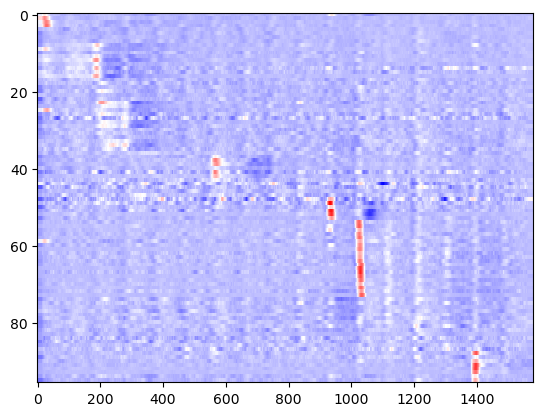

In [649]:
l = 9
plt.imshow(cnmf_dicts[l]['savs_nc'][np.argsort(cnmf_dicts[l]['rises']),...], interpolation='nearest', aspect='auto',cmap='bwr')

In [505]:
# try to merge and cluster on all the good ones!
for l in [2,4,5,6,7,8,9]:
    print(cnmf_dicts[l]['savs_nc'].shape)

(108, 1581)
(73, 1581)
(99, 1581)
(98, 1581)
(61, 1581)
(84, 1581)
(98, 1581)


In [650]:
l=9
savs_nc_sum = np.zeros((0,cnmf_dicts[l]['savs_nc'].shape[1]))
#for l in [2,4,5,6,7,8]:
for l in [5,8]:
    savs_nc_sum = np.vstack((savs_nc_sum,cnmf_dicts[l]['savs_nc']))

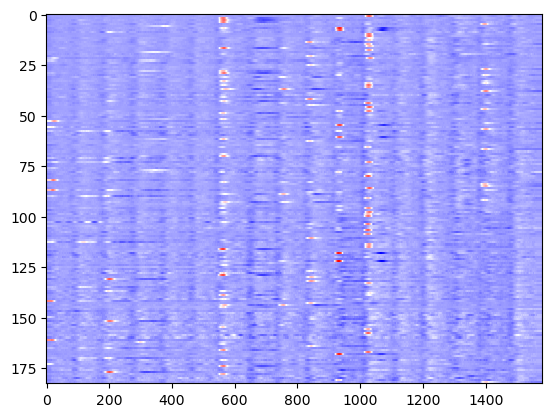

In [651]:
plt.imshow(savs_nc_sum, interpolation='nearest', aspect='auto',cmap='bwr')

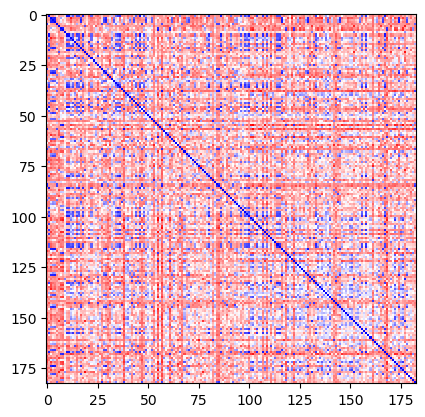

In [652]:
from scipy.spatial.distance import pdist,squareform
plt.imshow(squareform(pdist(savs_nc_sum,'correlation')), interpolation='nearest',cmap='bwr')

In [653]:
from sklearn.cluster import HDBSCAN
hdbs = HDBSCAN(min_cluster_size = 3,metric='precomputed')
hdbs.fit(squareform(pdist(savs_nc_sum,'correlation')))
#hdbs.fit(savs_nc)
lcounts = np.array(np.unique(hdbs.labels_, return_counts=True))
hdbs.labels_

array([ 9, 10,  6,  6,  6,  9,  0,  1,  1,  4, 10, 10, 10, 10,  3, 10, 10,
        6, 10,  0, -1,  3, 10, -1,  1,  3, -1,  9,  6,  6, -1, -1, -1, -1,
       10, 10, 10,  7,  9, -1, -1, -1,  3,  6, 10,  3, 10,  9, 10,  6, -1,
       -1,  6,  2, -1,  1, -1,  9,  5, -1, -1,  1,  6,  3, -1, -1, -1,  9,
       -1, -1,  6,  5, -1, -1, -1, -1, -1,  0, -1, -1, 10, -1,  2, -1,  9,
        9, 10,  2,  3,  7,  5, 10, -1,  7, -1,  1, 10,  1, 10, 10, 10,  8,
        8, -1, 10, -1, -1, 10,  8, 10, -1,  3, -1,  5, 10, 10,  6, -1,  1,
        8, -1, -1,  1, -1, -1,  8, -1,  3, -1,  6,  3,  4,  3, 10,  8,  5,
        8, -1, -1,  6,  8, -1,  2,  3,  7,  6, -1, -1, -1, -1,  8,  8,  4,
       -1, -1, -1, 10, -1, 10, -1, -1,  2, -1, -1,  3,  5,  6, 10,  1, -1,
        5, -1,  8, -1,  6,  8,  8,  4,  6, -1, -1,  1,  9], dtype=int64)

In [654]:
lcounts

array([[-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [64,  3, 11,  5, 13,  4,  7, 18,  4, 13, 10, 31]], dtype=int64)

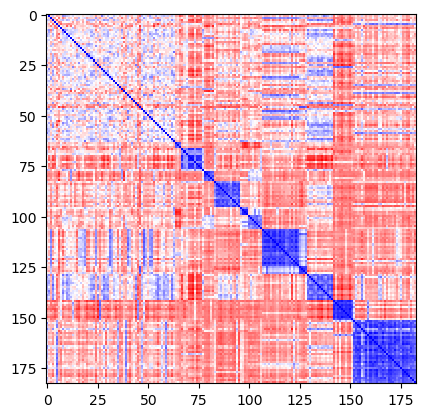

In [655]:
plt.imshow(squareform(pdist(savs_nc_sum[np.argsort(hdbs.labels_),...],'correlation')), interpolation='nearest',cmap='bwr')

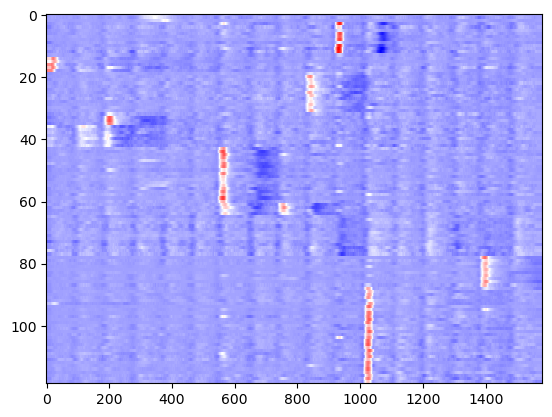

In [657]:
plt.imshow(savs_nc_sum[np.argsort(hdbs.labels_)[64:],...], interpolation='nearest',aspect='auto',cmap='bwr')

In [658]:
l=9
binary_ids = np.zeros((len(well_ids[l]),savs_nc_sum.shape[1]))
for i in range(len(well_ids[l])):
    binary_ids[i,well_onsets[l][i]:well_onsets[l][i]+3*mean_factor[l]] = 1

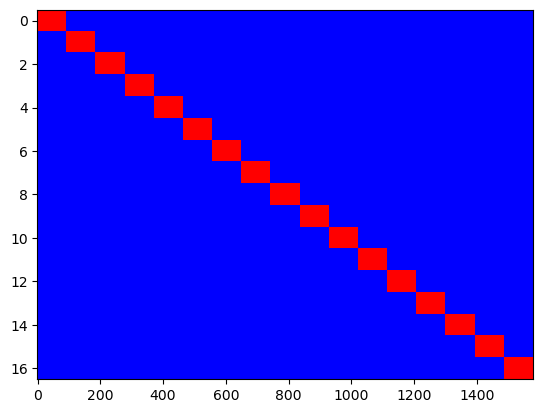

In [659]:
plt.imshow(binary_ids, interpolation='nearest',aspect='auto',cmap='bwr')

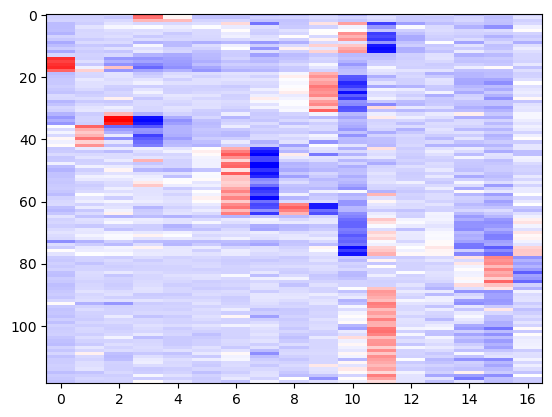

In [660]:
plt.imshow(np.matmul(savs_nc_sum[np.argsort(hdbs.labels_)[64:],...],binary_ids.T), interpolation='nearest',aspect='auto',cmap='bwr')

In [661]:
l=9
CY_matched_raw_corr_norm1_sum = np.zeros((0,cnmf_dicts[l]['CY_matched_raw_corr_norm1'].shape[1]))
#for l in [2,4,5,6,7,8]:
for l in [5,8]:
    CY_matched_raw_corr_norm1_sum = np.vstack((CY_matched_raw_corr_norm1_sum,cnmf_dicts[l]['CY_matched_raw_corr_norm1']))

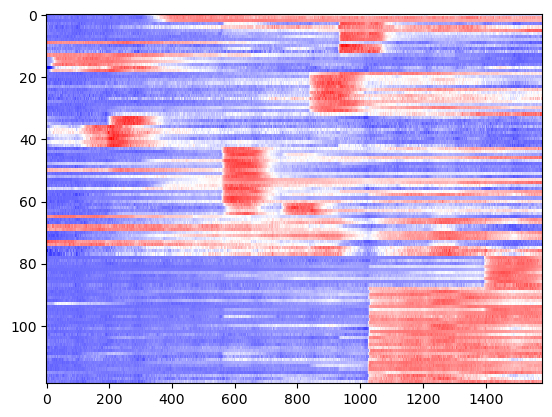

In [662]:
plt.imshow(CY_matched_raw_corr_norm1_sum[np.argsort(hdbs.labels_)[64:],...], interpolation='nearest',aspect='auto',cmap='bwr')

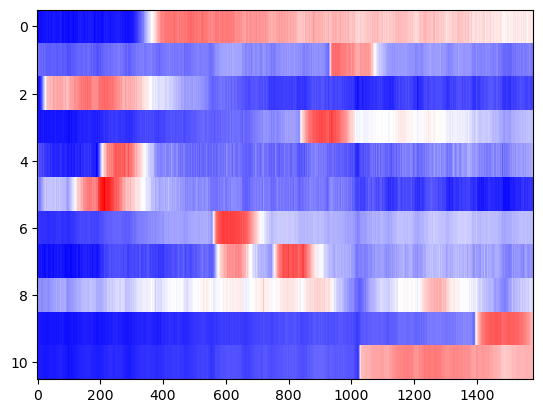

In [663]:
cluster_timecourses = np.zeros((np.max(hdbs.labels_)+1,cnmf_dicts[l]['savs_nc'].shape[1]))
for clu in range(0,np.max(hdbs.labels_)+1):
    cluster_timecourses[clu,:] = np.mean(CY_matched_raw_corr_norm1_sum[hdbs.labels_==clu,...],axis=0)
plt.imshow(cluster_timecourses, interpolation='nearest',aspect='auto',cmap='bwr')

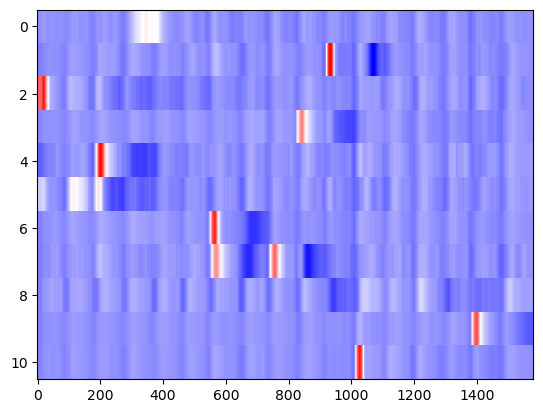

In [664]:
cluster_savs = np.zeros((np.max(hdbs.labels_)+1,cnmf_dicts[l]['savs_nc'].shape[1]))
for clu in range(0,np.max(hdbs.labels_)+1):
    cluster_savs[clu,:] = np.mean(savs_nc_sum[hdbs.labels_==clu,...],axis=0)
plt.imshow(cluster_savs, interpolation='nearest',aspect='auto',cmap='bwr')

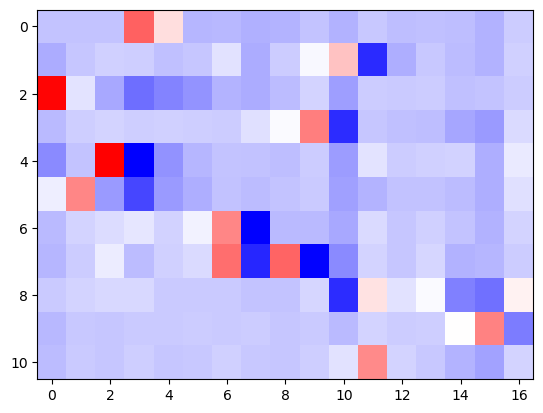

In [665]:
plt.imshow(np.matmul(cluster_savs,binary_ids.T), interpolation='nearest',aspect='auto',cmap='bwr')

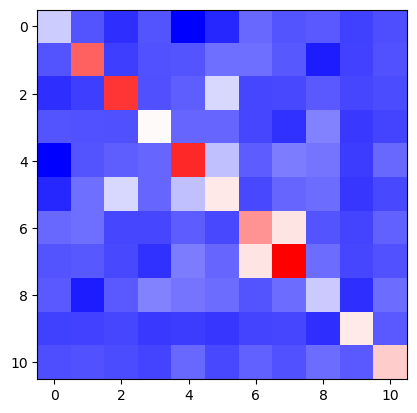

In [666]:
plt.imshow(np.matmul(cluster_savs,cluster_savs.T), interpolation='nearest',cmap='bwr')

In [527]:
clusts_keep = [0,1,2,3,4,5,6,7,9,10]
rows_keep = []
for j in clusts_keep:
    rows_keep += np.arange(np.sum(lcounts[1,0:j+1]),np.sum(lcounts[1,0:j+2])).tolist()

In [537]:
rises_sum = list()
for id in range(CY_matched_raw_corr_norm1_sum[np.argsort(hdbs.labels_)[rows_keep],...].shape[0]):
    sig_r = CY_matched_raw_corr_norm1_sum[np.argsort(hdbs.labels_)[rows_keep],...][id,...].T
    sav_test_r = sg.savgol_filter(sig_r,50,1,deriv=1)
    #rises.append(np.min(np.where(sav_test_m[:30,] == np.max(sav_test_m[:30,]))))
    rises_sum.append(np.min(np.where(sav_test_r == np.max(sav_test_r))))

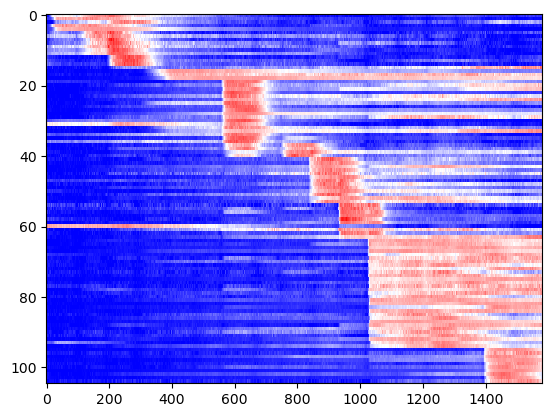

In [586]:
plt.imshow(CY_matched_raw_corr_norm1_sum[np.argsort(hdbs.labels_)[rows_keep],...][np.argsort(rises_sum),...], interpolation='nearest',aspect='auto',cmap='bwr',vmin=0)

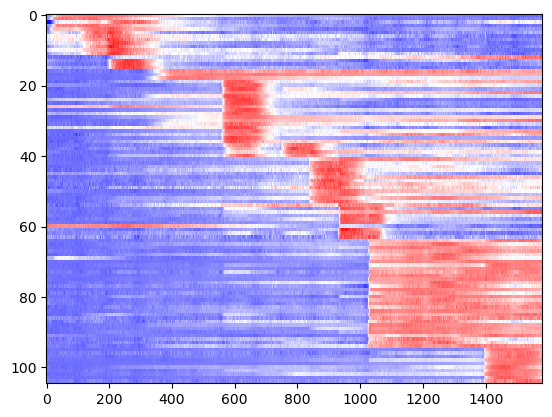

In [540]:
CY_matched_raw_corr_norm1_sum_ordered = np.zeros((0,CY_matched_raw_corr_norm1_sum[np.argsort(hdbs.labels_)[rows_keep],...].shape[1]))
#clust_groups = [[5,6],[7],[3],[0,1],[8],[9],[2],[4],[12,13,14],[11]]
clust_groups = [[2],[5],[4],[0],[6],[7],[3],[1],[10],[9]]
for cg in clust_groups:
    for c in cg:
        CY_matched_raw_corr_norm1_sum_ordered = np.vstack((CY_matched_raw_corr_norm1_sum_ordered,CY_matched_raw_corr_norm1_sum[np.argsort(hdbs.labels_)[np.arange(np.sum(lcounts[1,0:c+1]),np.sum(lcounts[1,0:c+2])).tolist()],...]))
plt.imshow(CY_matched_raw_corr_norm1_sum_ordered, interpolation='nearest',aspect='auto',cmap='bwr')

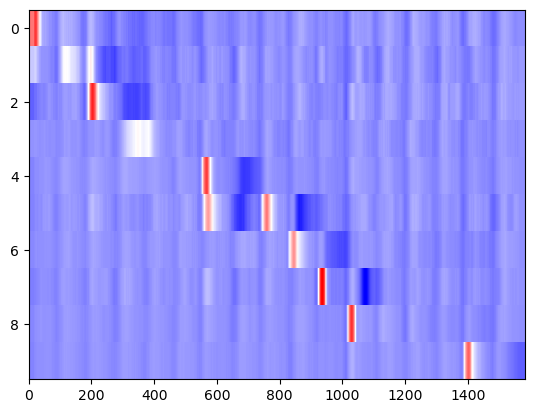

In [553]:
plt.imshow(cluster_savs[[x for y in clust_groups for x in y],], interpolation='nearest',aspect='auto',cmap='bwr')

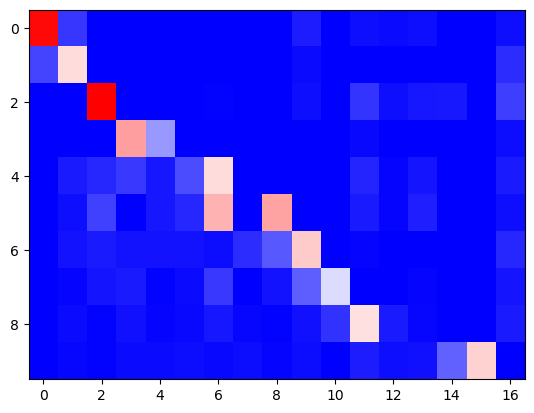

In [583]:
plt.imshow(np.matmul(cluster_savs[[x for y in clust_groups for x in y],],binary_ids.T), interpolation='nearest',aspect='auto',cmap='bwr',vmin=0)

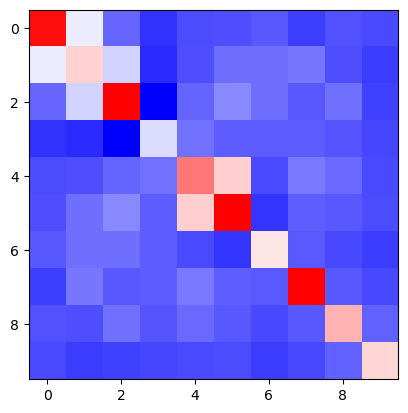

In [561]:
plt.imshow(np.matmul(cluster_savs[[x for y in clust_groups for x in y],],cluster_savs[[x for y in clust_groups for x in y],].T), interpolation='nearest',cmap='bwr',vmax=0.03)

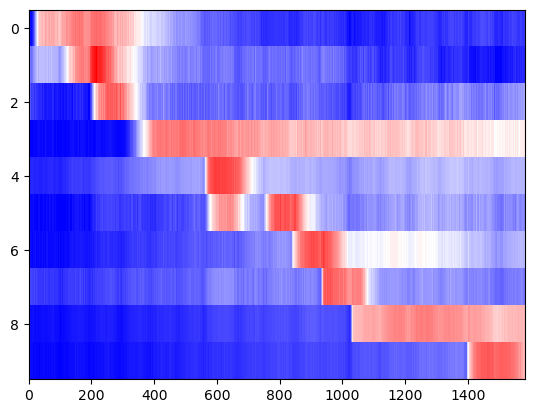

In [587]:
plt.imshow(cluster_timecourses[[x for y in clust_groups for x in y],], interpolation='nearest',aspect='auto',cmap='bwr',vmin=0)

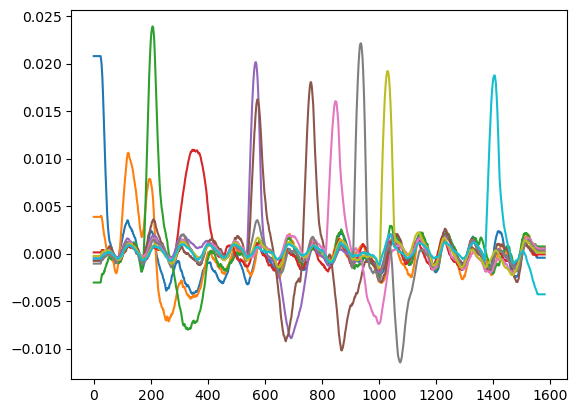

In [570]:
cluster_savs_all = []
for id in range(0,cluster_timecourses.shape[0]-1):
    sig_r = cluster_timecourses[[x for y in clust_groups for x in y],][id,...].T
    cluster_savs_all.append(sg.savgol_filter(sig_r,50,1,deriv=1))
    #rises.append(np.min(np.where(sav_test_m[:30,] == np.max(sav_test_m[:30,]))))
   #np.min(np.where(sav_test_r == np.max(sav_test_r))))
cluster_savs_all = np.array(cluster_savs_all)
plt.plot(cluster_savs_all.T)

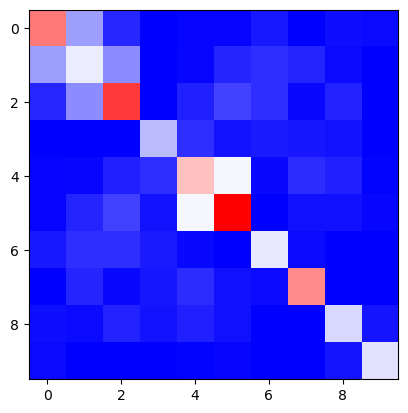

In [582]:
plt.imshow(np.matmul(cluster_savs_all,cluster_savs_all.T), interpolation='nearest',cmap='bwr',vmin=0)

In [458]:
CY_matched_raw_corr_norm1_sum_ordered.shape

(0, 1581)

In [454]:
CY_matched_raw_corr_norm1_sum[np.argsort(hdbs.labels_)[np.arange(np.sum(lcounts[1,0:j+1]),np.sum(lcounts[1,0:j+2])).tolist()],...].shape

(8, 1581)

In [462]:
clust_groups[1][0]

7

In [463]:
CY_matched_raw_corr_norm1_sum[np.argsort(hdbs.labels_)[np.arange(np.sum(lcounts[1,0:c+1]),np.sum(lcounts[1,0:c+2])).tolist()],...].shape

(9, 1581)

In [464]:
c

11

In [1]:
af

NameError: name 'af' is not defined